# Assignment 5
# Image and Video Analytics 
Vishali Sharma(21MIA1066)


In [1]:
!pip install kaggle


     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 435.7 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/82.7 kB 435.7 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/82.7 kB 435.7 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/82.7 kB 435.7 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.7 kB 131.3 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.7 kB 182.2 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.7 kB 182.2 kB/s eta 0:00:01
     --

In [2]:
import os

# Create a directory for the dataset if it doesn't exist
os.makedirs("datasets", exist_ok=True)

# Download the dataset from Kaggle
!kaggle datasets download -d cashutosh/gender-classification-dataset -p datasets

# Unzip the downloaded dataset
!unzip datasets/gender-classification-dataset.zip -d datasets

print("Dataset downloaded and extracted to 'datasets' folder.")


Dataset URL: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
License(s): other



  0%|          | 0.00/269M [00:00<?, ?B/s]
  0%|          | 1.00M/269M [00:01<07:05, 662kB/s]
  1%|          | 2.00M/269M [00:02<05:48, 804kB/s]
  1%|1         | 3.00M/269M [00:03<05:18, 876kB/s]
  1%|1         | 4.00M/269M [00:04<04:44, 979kB/s]
  2%|1         | 5.00M/269M [00:05<04:52, 948kB/s]
  2%|2         | 6.00M/269M [00:06<04:56, 932kB/s]
  3%|2         | 7.00M/269M [00:07<04:40, 980kB/s]
  3%|2         | 8.00M/269M [00:08<04:35, 996kB/s]
  3%|3         | 9.00M/269M [00:09<04:14, 1.07MB/s]
  4%|3         | 10.0M/269M [00:10<04:05, 1.11MB/s]
  4%|4         | 11.0M/269M [00:11<04:05, 1.10MB/s]
  4%|4         | 12.0M/269M [00:12<04:06, 1.09MB/s]
  5%|4         | 13.0M/269M [00:13<03:59, 1.12MB/s]
  5%|5         | 14.0M/269M [00:14<04:31, 985kB/s] 
  6%|5         | 15.0M/269M [00:15<04:09, 1.07MB/s]
  6%|5         | 16.0M/269M [00:16<03:52, 1.14MB/s]
  6%|6         | 17.0M/269M [00:17<04:38, 951kB/s] 
  7%|6         | 18.0M/269M [00:18<04:17, 1.02MB/s]
  7%|7         | 19.0M/269M 

Archive:  datasets/gender-classification-dataset.zip
Dataset downloaded and extracted to 'datasets' folder.


  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of datasets/gender-classification-dataset.zip or
        datasets/gender-classification-dataset.zip.zip, and cannot find datasets/gender-classification-dataset.zip.ZIP, period.


In [4]:
!ls datasets

gender-classification-dataset.zip


In [11]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set paths for training data
train_path = r"C:\Users\hp\Downloads\archive (1)\Training"
validation_path = r"C:\Users\hp\Downloads\archive (1)\Validation"

In [3]:
# Get list of male and female directories
male_train_dir = os.path.join(train_path, 'male')
female_train_dir = os.path.join(train_path, 'female')

In [4]:
# Read image filenames
male_images = [os.path.join(male_train_dir, img) for img in os.listdir(male_train_dir) if img.endswith('.jpg')]
female_images = [os.path.join(female_train_dir, img) for img in os.listdir(female_train_dir) if img.endswith('.jpg')]

In [5]:
# Define a function to read and resize images
def load_images(image_paths, size=(128, 128)):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, size)
        images.append(img)
    return np.array(images)

In [6]:
# Load training images
male_train_images = load_images(male_images)
female_train_images = load_images(female_images)

print(f'Male images: {len(male_train_images)}, Female images: {len(female_train_images)}')

Male images: 23766, Female images: 23243


In [7]:
import random

# Load the pre-trained Haar Cascade classifier for face detection
cascade_path = r"C:\Users\hp\Downloads\haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)


In [8]:
# Define a function to detect faces in the images
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(30, 30))
    return faces

In [9]:
# Select 5 random images from the male_train_images list
random_images = random.sample(list(male_train_images), 5)

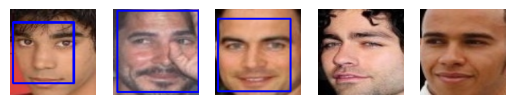

In [12]:
# Loop through the random images and process each one
for i, image in enumerate(random_images):
    # Detect faces in the image
    faces_detected = detect_faces(image)
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces_detected:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # Convert the image from BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.subplot(1, 5, i+1)  # Display 5 images in a row
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels

# Show all images at once
plt.show()

In [13]:
# Define a function to crop and normalize faces
def crop_and_normalize_faces(images):
    cropped_faces = []
    for img in images:
        faces = detect_faces(img)
        for (x, y, w, h) in faces:
            # Crop the face region
            face_region = img[y:y+h, x:x+w]
            # Resize to a standard size
            face_resized = cv2.resize(face_region, (128, 128))
            cropped_faces.append(face_resized)
    return np.array(cropped_faces)

# Apply the function to both male and female images
male_faces = crop_and_normalize_faces(male_train_images)
female_faces = crop_and_normalize_faces(female_train_images)

# Check how many faces were detected and cropped
print(f'Male faces detected: {len(male_faces)}, Female faces detected: {len(female_faces)}')


Male faces detected: 15192, Female faces detected: 16980


In [14]:
eye_cascade = cv2.CascadeClassifier(r"C:\Users\hp\Downloads\haarcascade_eye.xml")
mouth_cascade = cv2.CascadeClassifier(r"C:\Users\hp\Downloads\haarcascade_mcs_mouth.xml")
nose_cascade = cv2.CascadeClassifier(r"C:\Users\hp\Downloads\haarcascade_mcs_nose.xml")

# Check if cascades are loaded
if eye_cascade.empty():
    print("Error loading eye cascade")
if nose_cascade.empty():
    print("Error loading nose cascade")
if mouth_cascade.empty():
    print("Error loading mouth cascade")

In [15]:
# Define a function to extract geometric features and annotate them
def extract_geometric_features_and_display(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect eyes, nose, and mouth
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
    nose = nose_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
    mouth = mouth_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    features = {}
    
    # Draw eyes and calculate distance between them
    if len(eyes) >= 2:
        eye1, eye2 = eyes[0], eyes[1]
        eye_distance = np.linalg.norm(np.array([eye1[0], eye1[1]]) - np.array([eye2[0], eye2[1]]))
        features['eye_distance'] = eye_distance
        cv2.rectangle(image, (eye1[0], eye1[1]), (eye1[0]+eye1[2], eye1[1]+eye1[3]), (0, 255, 0), 2)
        cv2.rectangle(image, (eye2[0], eye2[1]), (eye2[0]+eye2[2], eye2[1]+eye2[3]), (0, 255, 0), 2)
    
    # Draw nose
    if len(nose) > 0:
        nose_position = nose[0]
        features['nose_position'] = (nose_position[0], nose_position[1])
        cv2.rectangle(image, (nose_position[0], nose_position[1]), (nose_position[0]+nose_position[2], nose_position[1]+nose_position[3]), (255, 0, 0), 2)
    
    # Draw mouth
    if len(mouth) > 0:
        mouth_position = mouth[0]
        features['mouth_position'] = (mouth_position[0], mouth_position[1])
        cv2.rectangle(image, (mouth_position[0], mouth_position[1]), (mouth_position[0]+mouth_position[2], mouth_position[1]+mouth_position[3]), (0, 0, 255), 2)
    
    # Calculate distances between the detected landmarks
    if 'eye_distance' in features and 'nose_position' in features:
        eye_to_nose_distance = np.linalg.norm(np.array([eye1[0], eye1[1]]) - np.array([nose_position[0], nose_position[1]]))
        features['eye_to_nose_distance'] = eye_to_nose_distance
    
    if 'nose_position' in features and 'mouth_position' in features:
        nose_to_mouth_distance = np.linalg.norm(np.array([nose_position[0], nose_position[1]]) - np.array([mouth_position[0], mouth_position[1]]))
        features['nose_to_mouth_distance'] = nose_to_mouth_distance
    
    return features, image


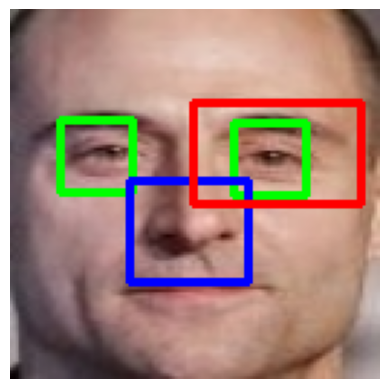

Geometric Features for the selected image:
eye_distance: 60.00833275470999
nose_position: (41, 59)
mouth_position: (63, 32)
eye_to_nose_distance: 31.89043743820395
nose_to_mouth_distance: 34.828149534535996


In [16]:
# Pick a random image from the dataset (in this case, male images)
random_image = random.choice(male_train_images)

# Extract geometric features and annotate the image
geometric_features, annotated_image = extract_geometric_features_and_display(random_image)

# Convert image to RGB for display with matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the annotated image
plt.imshow(annotated_image_rgb)
plt.axis('off')
plt.show()

# Print the geometric features
print("Geometric Features for the selected image:")
for key, value in geometric_features.items():
    print(f"{key}: {value}")


In [17]:
# Define a function to apply Sobel edge detection
def apply_sobel(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Sobel filter
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel in x-direction
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel in y-direction
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)  # Combine both
    return sobel_edges

In [18]:
# Define a function to apply Canny edge detection
def apply_canny(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)  # You can adjust the thresholds
    return edges

In [19]:
# Select a random male face to visualize
random_face = random.choice(male_faces)

# Apply Canny and Sobel edge detection
canny_edges = apply_canny(random_face)
sobel_edges = apply_sobel(random_face)

# Display the original face, Canny edges, and Sobel edges
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(-0.5, 127.5, 127.5, -0.5)

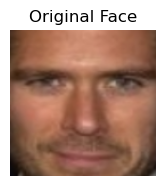

In [20]:
# Original face
plt.subplot(1, 3, 1)
plt.title("Original Face")
plt.imshow(cv2.cvtColor(random_face, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

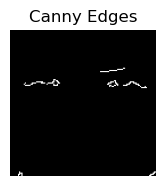

In [21]:
# Canny edges
plt.subplot(1, 3, 2)
plt.title("Canny Edges")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

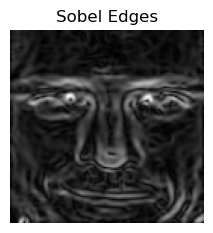

In [22]:
# Sobel edges
plt.subplot(1, 3, 3)
plt.title("Sobel Edges")
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
# Function to extract geometric features, including jawline width
def extract_geometric_features(face_image):
    gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    
    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
    
    if len(eyes) >= 2:
        eye1, eye2 = eyes[0], eyes[1]
        eye_distance = np.linalg.norm(np.array([eye1[0], eye1[1]]) - np.array([eye2[0], eye2[1]]))
    else:
        eye_distance = 0  # Default value if eyes are not detected

    # Estimate jawline width using face image dimensions
    jawline_width = face_image.shape[1]  # The width of the cropped face image

    return eye_distance, jawline_width

In [24]:
# Function to classify gender based on extracted features
def classify_gender(face_image):
    # Extract geometric features
    eye_distance, jawline_width = extract_geometric_features(face_image)

    # Classification rules
    # You may need to adjust these threshold values based on your dataset
    if jawline_width > 70:  # Example threshold for jawline width
        return 'Male'
    else:
        return 'Female'

# Apply the classification on cropped faces
male_count = 0
female_count = 0

for face in male_faces:
    gender = classify_gender(face)
    if gender == 'Male':
        male_count += 1
    else:
        female_count += 1

for face in female_faces:
    gender = classify_gender(face)
    if gender == 'Male':
        male_count += 1
    else:
        female_count += 1

# Print results
print(f'Male faces classified: {male_count}, Female faces classified: {female_count}')

Male faces classified: 32172, Female faces classified: 0


In [ ]:
# Get list of image files in the validation folder
validation_images = [os.path.join(validation_path, img) for img in os.listdir(validation_path) if img.endswith('.jpg')]

In [ ]:
# Define a function to detect faces in the images
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(30, 30))
    return faces

In [ ]:
# Function to extract geometric features, including jawline width
def extract_geometric_features(face_image):
    gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    
    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))
    
    if len(eyes) >= 2:
        eye1, eye2 = eyes[0], eyes[1]
        eye_distance = np.linalg.norm(np.array([eye1[0], eye1[1]]) - np.array([eye2[0], eye2[1]]))
    else:
        eye_distance = 0  # Default value if eyes are not detected

    # Estimate jawline width using face image dimensions
    jawline_width = face_image.shape[1]  # The width of the cropped face image

    return eye_distance, jawline_width

In [ ]:
# Function to classify gender based on extracted features
def classify_gender(face_image):
    # Extract geometric features
    eye_distance, jawline_width = extract_geometric_features(face_image)

    # Classification rules
    # Adjust these threshold values based on your dataset
    if jawline_width > 70:  # Example threshold for jawline width
        return 'Male'
    else:
        return 'Female'

In [ ]:
# Function to process validation images and classify gender
def process_validation_images(validation_images):
    results = {}
    
    for img_path in validation_images:
        img = cv2.imread(img_path)
        faces = detect_faces(img)
        
        for (x, y, w, h) in faces:
            face_region = img[y:y+h, x:x+w]
            gender = classify_gender(face_region)
            # Draw rectangle and label on the image
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw rectangle around face
            cv2.putText(img, gender, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)  # Add label

        results[img_path] = img  # Store the annotated image

    return results

In [ ]:
# Process the validation images and get results
classified_results = process_validation_images(validation_images)

# Display the classified results
for img_path, annotated_image in classified_results.items():
    # Convert the image from BGR to RGB for matplotlib
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(annotated_image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.title(os.path.basename(img_path))
    plt.show()